In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import arviz as az
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Vielleicht haben wir alle aufgrund unserer Erfahrung das Gefühl, dass bei Ehepaaren (oder bei Paaren allgemein) der Ehemann (oder Mann) älter ist als die Ehefrau (oder Frau). Es gibt eine Studie aus Grossbritanien, die diese Behauptung untersucht. Im Datensatz `husband_wife.csv` sind die Daten von 170 Ehepaaren aufgeführt.

In [2]:
data = pd.read_csv("./Daten/husband_wife.csv")
data.head()

,age.husband,height.husband,age.wife,height.wife
0,49,180,43,159
1,25,184,28,156
2,40,165,30,162
3,52,177,57,154
4,58,161,52,142


Für jedes Ehepaar gibt es zwei Messungen: das Alter der Ehefrau und das Alter des Ehemannes. Wir interessieren uns für den Altersunterschied. In diesem Fall haben wir ja für jedes Testobjekt, nämlich für jedes Paar, zwei Messgrössen, nämlich das Alter der Frau und das Alter des Mannes. In diesem Fall ist es naheliegend, die `Differenz` des Alters zu betrachten. 

In [3]:
diff = data["age.husband"] - data["age.wife"]
diff.head()

0     6
1    -3
2    10
3    -5
4     6
dtype: int64

Dies hat den Vorteil, dass wir nicht zwei Posterior-Verteilungen betrachten müssen, sondern nur noch eine. 

Zuerst wollen wir den Q-Q-Plot der Differenzen in der Abbildung unten betrachten. 

Text(0.5, 1.0, 'Differenz Alter')

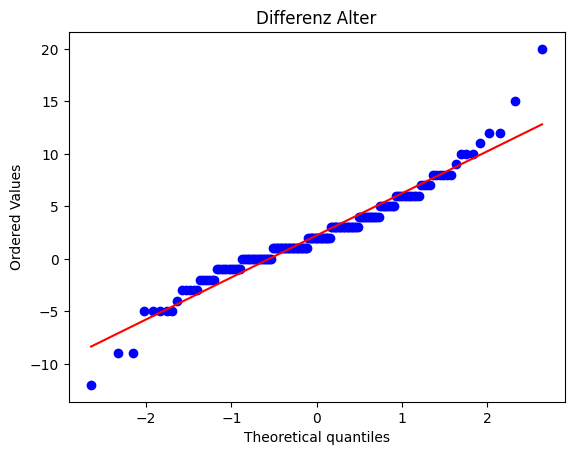

In [4]:
st.probplot(diff,plot=plt)
plt.title("Differenz Alter")

Wir können in diesem Fall von normalverteilten Altersdifferenzen ausgehen, obwohl am unteren und am oberen Ende die Datenpunkte ein bisschen ausreissen. 


Wir wählen für die Likelihood-Funktion wiederum die Normalverteilung. Als Prior-Verteilung wählen wir auch für diesen Fall eine gleichförmige Verteilung, was unser Unwissen in Bezug auf die Altersdifferenzen ausdrückt.  Wir wählen eine Gleichverteilung im Bereich $ [-10, 10] $, d.h., wir gehen also davon aus, dass der mittlere Unterschied im Bereich von $ -10 $ bis $ 10 $ Jahren liegt, wobei alle Werte gleich wahrscheinlich sind. Warum wählen wir auch noch negative Werte von $ \mu $? Nun wir wissen nicht, ob unsere Erfahrung, dass Ehemänner tendentiell älter sind als ihre Ehefrauen, für alle Ehepaare zutrifft. Es könnte ja sein, dass in _unserem_ Freundeskreis die Ehemänner eher älter sind als die Ehefrauen, wobei dies nicht im  Allgemeinen der Fall sein muss. 

Da die Standardabweichung schwierig zu schätzen ist, nehmen wir als Standardabweichung die geschätzte Standardabweichung der Daten `diff.std()`. Somit erhalten wir das folgende `pymc3`-Modell.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<Axes: title={'center': 'μ'}>

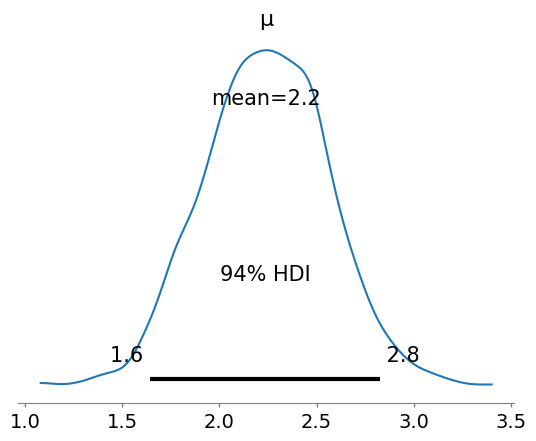

In [6]:
with pm.Model() as model_paired:
    μ = pm.Uniform('μ', lower=-10, upper=10)
    σ = diff.std()
    y = pm.Normal('y', mu=μ, sigma=σ, observed=diff)
    trace_paired = pm.sample(1000)

az.plot_posterior(trace_paired)

Somit liegt der Mittelwert der Posterior-Verteilung bei $ \mu=2.2 $ und 94\% der wahrscheinlichsten Werte für $ \mu $ liegen im Bereich $ [1.6,2.8] $. 

Nun stellt sich noch die Frage, ob es einen statistisch relevanten Unterschied beim Altersunterschied gibt. Nehmen wir einmal an, dass es keinen Altersunterschied gibt, also $ \mu=0 $. Wie lautet Ihre Test-Entscheidung?